In [1]:
import salvus.namespace as sn
from my_code.utilities import *
import matplotlib.pyplot as plt
from pathlib import Path

--> Server: 'https://l.mondaic.com/licensing_server', User: 'bristol.support', Group: 'UniversityOfBristol'.
--> Negotiating 1 license instance(s) for 'SalvusMesh' [license version 1.0.0] for 1 seconds ...
--> Success! [Total duration: 0.39 seconds]


In [2]:
# Directories in Windows
PROJECT_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/Project'
DATA_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/data'
IMAGE_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/image'

N_GRAIN = 5
PROJECT_NAME = fr"forward_orientation_map_grains_{N_GRAIN}"

CENTRAL_FREQUENCY = 1e6  # MHz


p = sn.Project(path=Path(PROJECT_DIR_WIN, PROJECT_NAME))
events_list = reorder_events_list(p.events.list())


Accordion(children=(HTML(value='\n                <head>\n                <style>\n                td {\n     …

Font 'default' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.


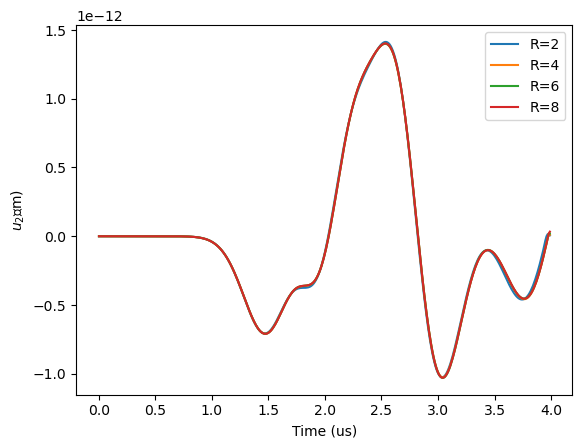

In [9]:
ele_per_wavelength_ls = ele_per_wavelength_ls = np.arange(1,13,1)

for ele_per_wavelength in ele_per_wavelength_ls[:4]: 
    ed = [p.waveforms.get(data_name=fr"mesh_heterogeneous_{ele_per_wavelength}", events=e)[0] for e in events_list]
    start_time = ed[0].get_time_axis_from_meta_json().to_array()[0]
    ed[0].set_temporal_interpolation(
    start_time_in_seconds=0.0, sampling_rate_in_hertz=CENTRAL_FREQUENCY*100, npts=400)
    filed = "displacement"     # received fileds

    time = ed[0].get_waveform_data_xarray(receiver_field=filed).time
    u_2 = ed[0].get_waveform_data_xarray(receiver_field=filed).sel(component='Y')
    
    plt.plot(time*1e6, u_2[0, :],label=fr'R={int(2*ele_per_wavelength)}')
    
plt.legend()
plt.ylabel(rf'$u_2$（m)')
plt.xlabel('Time (us)')  
plt.savefig(Path(IMAGE_DIR_WIN, fr'computation_time.png'))




In [4]:

p.viz.nb.simulation_setup(
    simulation_configuration=fr"mesh_heterogeneous_4",
    events=p.events.list(),
)


In [5]:
ed = [p.waveforms.get(data_name=fr"mesh_heterogeneous_{ele_per_wavelength_ls[-1]}", events=e)[0] for e in events_list]
start_time = ed[0].get_time_axis_from_meta_json().to_array()[0]
ed[0].set_temporal_interpolation(
start_time_in_seconds=0.0, sampling_rate_in_hertz=CENTRAL_FREQUENCY*100, npts=400)
filed = "displacement"     # received fileds

time = ed[0].get_waveform_data_xarray(receiver_field=filed).time
u_2_true = ed[0].get_waveform_data_xarray(receiver_field=filed).sel(component='Y')



rmse = []
for ele_per_wavelength in ele_per_wavelength_ls: 
    ed = [p.waveforms.get(data_name=fr"mesh_heterogeneous_{ele_per_wavelength}", events=e)[0] for e in events_list]
    start_time = ed[0].get_time_axis_from_meta_json().to_array()[0]
    ed[0].set_temporal_interpolation(
    start_time_in_seconds=0.0, sampling_rate_in_hertz=CENTRAL_FREQUENCY*100, npts=400)
    filed = "displacement"     # received fileds

    time = ed[0].get_waveform_data_xarray(receiver_field=filed).time
    u_2 = ed[0].get_waveform_data_xarray(receiver_field=filed).sel(component='Y')
    rmse.append( np.sum(np.linalg.norm(u_2 - u_2_true, axis=1) / np.sqrt(u_2_true.shape[1])).item() / np.max(u_2_true).item() / u_2_true.shape[0] )
    


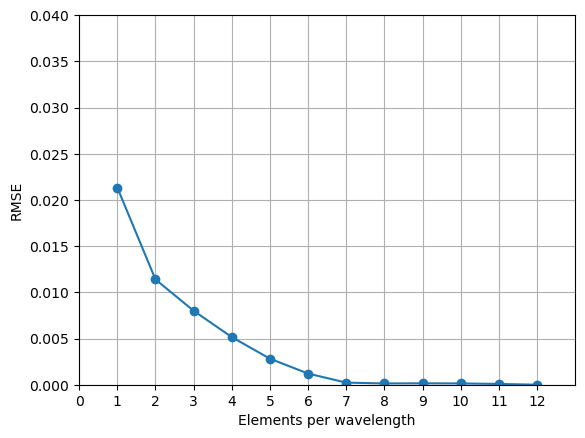

In [6]:

plt.plot(np.array(ele_per_wavelength_ls), rmse, marker='o')
plt.xlabel('Elements per wavelength')
plt.ylabel(rf'RMSE')

plt.grid(True)
plt.xlim(0, 13)
plt.ylim(0,0.04)
plt.xticks(np.arange(0, 13, 1))   # set specific tick locations
plt.savefig(Path(IMAGE_DIR_WIN, fr'RMSE_elements_per_wavelength_grains_{N_GRAIN}.png'))
